In [20]:
import tensorflow.keras as tk
mnist = tk.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

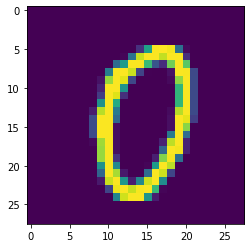

0


In [21]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1000])
plt.show()

print(y_train[1000])

In [24]:
print(x_train[100].shape)
x_train = x_train.reshape(x_train.shape[0], 28, 28)
print(x_train[1643].shape)
x_test = x_test.reshape(x_test.shape[0], 28, 28)

input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_train /= 255

x_test = x_test.astype('float32')
x_test /= 255

(28, 28)
(28, 28)


In [9]:
print (y_train[0])
y_train = tk.utils.to_categorical(y_train, 10)
y_test = tk.utils.to_categorical(y_test, 10)

print (y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [10]:
model = tk.models.Sequential()
model.add(tk.layers.Conv2D(32, kernel_size=(3,3), activation = 'relu', input_shape=input_shape))
model.add(tk.layers.Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(tk.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tk.layers.Dropout(0.25))
model.add(tk.layers.Flatten())
model.add(tk.layers.Dense(128, activation='relu'))
model.add(tk.layers.Dropout(0.5))
model.add(tk.layers.Dense(10, activation='softmax'))

In [11]:
model.compile(loss=tk.losses.categorical_crossentropy, optimizer=tk.optimizers.Adadelta(), metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
469/469 [==============================] - 148s 313ms/step - loss: 2.2804 - accuracy: 0.1436 - val_loss: 2.2477 - val_accuracy: 0.2968
Epoch 2/20
469/469 [==============================] - 148s 315ms/step - loss: 2.2285 - accuracy: 0.2458 - val_loss: 2.1818 - val_accuracy: 0.4740
Epoch 3/20
469/469 [==============================] - 148s 316ms/step - loss: 2.1580 - accuracy: 0.3467 - val_loss: 2.0906 - val_accuracy: 0.6007
Epoch 4/20
469/469 [==============================] - 148s 316ms/step - loss: 2.0643 - accuracy: 0.4334 - val_loss: 1.9674 - val_accuracy: 0.6690
Epoch 5/20
469/469 [==============================] - 148s 315ms/step - loss: 1.9379 - accuracy: 0.4988 - val_loss: 1.8070 - val_accuracy: 0.7193
Epoch 6/20
469/469 [==============================] - 146s 312ms/step - loss: 1.7804 - accuracy: 0.5549 - val_loss: 1.6136 - val_accuracy: 0.7546
Epoch 7/20
469/469 [==============================] - 147s 314ms/step - loss: 1.6109 - accuracy: 0.5957 - val_loss: 1.4073 -

In [12]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 7s 23ms/step - loss: 0.4718 - accuracy: 0.8796


[0.4718010127544403, 0.8795999884605408]